**Data Understanding:**

This dataset demonstrates the movies released between years 1915 and 2020, It contains data of the movie name, its id, release date, production budget, domestic gross and worldwide gross.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df_budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# Looking at our info table, we have 5782 rows and 6 columns
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
# Looking at our statistical summary, only id column shows up because all the other columns are string type. 
df_budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


**Data Cleaning:** 

Looking at our info table, we don't have any mising values in our dataset. We see that only the ID column's data type is integers but theoretically production_budget, domestic_gross and worldwide_gross columns should also contain their values as integers. We cannot perform any statistical analysis on string data type so we'll convert them to integers. Additionally, the release_date column should be converted to datetime class.

In [6]:
#Changing Data Types
df_budget['release_date'] = pd.to_datetime(df_budget['release_date'])
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [7]:
# Looking at our cleaned table
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [8]:
# Now with our cleaned data, we can see the statistical summary of all the columns.
df_budget.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [9]:
# We see that the unique movie names is less than the total number of rows we have 
df_budget['movie'].nunique()

5698

In [10]:
# We check to see if there are any duplicates of movies
df_budget['movie'].value_counts().head(10)

Halloween                       3
King Kong                       3
Home                            3
Teenage Mutant Ninja Turtles    2
Hellboy                         2
Unforgettable                   2
Peter Pan                       2
The Omen                        2
Cinderella                      2
The Calling                     2
Name: movie, dtype: int64

In [11]:
# It turns out it is just the remake of certain movies, so no duplicates.
df_budget[(df_budget['movie'] == 'King Kong')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
39,40,2005-12-14,King Kong,207000000,218080025,550517357
2374,75,1976-12-17,King Kong,23000000,52614445,90614445
5396,97,1933-04-07,King Kong,672000,10000000,10000650


In [12]:
df_budget[(df_budget['movie'] == 'Halloween')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3014,15,2007-08-31,Halloween,15000000,58269151,77514401
3535,36,2018-10-19,Halloween,10000000,159342015,254900667
5536,37,1978-10-17,Halloween,325000,47000000,70000000



We see that some of the movies have been remade a few times, three movies have been remade for three times King Kong, Halloween and Home. There are many movies that had been remade for two times. We can also conclude that inflation has been taken into effect in terms of budget and gross earnings over the years. 




**Data Analysis:** 

Top 10 values of worldwide_gross, domestic_gross and production_budget are extracted from the data. Most  popular movies earned higher gross.


In [13]:
df_budget.nlargest(10, ['worldwide_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157


In [14]:
df_budget.nlargest(10, ['domestic_gross'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
42,43,1997-12-19,Titanic,200000000,659363944,2208208395
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711
74,75,2008-07-18,The Dark Knight,185000000,533720947,1001996207


In [15]:
df_budget.nlargest(10, ['production_budget'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,2017-11-17,Justice League,300000000,229024295,655945209
9,10,2015-11-06,Spectre,300000000,200074175,879620923


Looking at the above tables with the highest values, we can conclude that Avatar movie generated the max worldwide gross earnings and the movie also had the highest bugdet in the dataset.


In [16]:
# The newest movie in our dataset is from the end of 2020 and the oldest movie is from 1915.
print('Newest movie:', df_budget['release_date'].max())
print('Oldest movie:', df_budget['release_date'].min())

Newest movie: 2020-12-31 00:00:00
Oldest movie: 1915-02-08 00:00:00


In [17]:
# A new column is created by changing the release_date to years
df_budget['year'] = pd.DatetimeIndex(df_budget['release_date']).year

In [18]:
# Since the analysis is on the films that are currently doing the best at the box office, 
# I wanted to extract the top grossing movies worldwide for the last 5 years.
last_10years = df_budget[(df_budget['year'] >= 2010)]
last_10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0,2014
5771,72,2015-05-19,Family Motocross,10000,0,0,2015
5772,73,2012-01-13,Newlyweds,9000,4584,4584,2012
5777,78,2018-12-31,Red 11,7000,0,0,2018


**Data Modeling:** 



**First Horizontal Bar Graph:** 

To make a better business recommendation for the recent trends of the movies, the top 15 movies with the highest worldwide gross earnings for the last 5 years (2015-2020) are shown in the graph below. 

In [19]:
top_worldwide_gross_in10years = last_10years.sort_values('worldwide_gross', ascending = False).iloc[:10]
top_worldwide_gross_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018


In [20]:
height_top10_gross = sorted(last_10years.sort_values(by='worldwide_gross', ascending=False)[:10]['worldwide_gross'].tolist())
top10_gross = last_10years.sort_values(by='worldwide_gross', ascending=False)[:10]['movie'].values.tolist()
top10_gross.reverse()

In [21]:
for i in range(len(height_top10_gross)):
    height_top10_gross[i] /= 1000000000

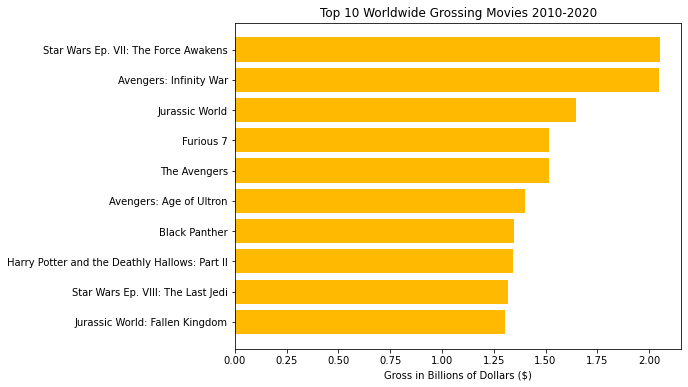

In [22]:
fig, ax =plt.subplots(figsize=(8, 6))
ax.barh(top10_gross, height_top10_gross, color = '#FFB900')
ax.set_title('Top 10 Worldwide Grossing Movies 2010-2020')
ax.set_xlabel('Gross in Billions of Dollars ($)');


**Scatter Plot:**

In order to understand if production budget has any relationship with worldwide gross earnings, I created a scatter plot to show the correlation between them.



Looking at this plot, we see a strong positive relationship between the production budget and worldwide gross. We can conclude that we definitely have some outliers with very high production budget and very low worldwide gross as well as the values with highest production budget and worldwide gross. 


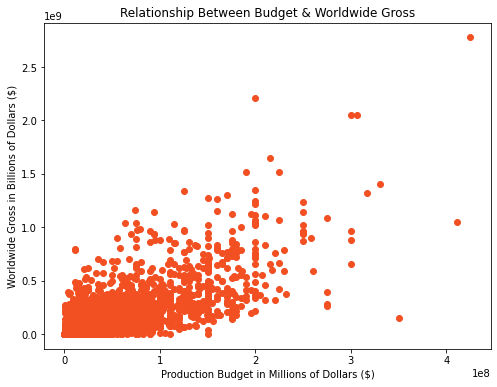

In [23]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x = df_budget['production_budget'], y = df_budget['worldwide_gross'], color = '#F25022')
ax.set_title('Relationship Between Budget & Worldwide Gross')
ax.set_xlabel('Production Budget in Millions of Dollars ($)')
ax.set_ylabel('Worldwide Gross in Billions of Dollars ($)');
#plt.savefig('scatterplot.png', bbox_inches='tight')

In [24]:
# Correlation coefficient of Production Budget & Worldwide Gross
df_budget['production_budget'].corr(df_budget['worldwide_gross'], method='pearson')

0.7483059765694748

**Second Horizontal Bar Graph:** 

The top 15 movies with the highest production budget for the last 5 years (2015-2020) are shown in the graph below. 

In [25]:
top_production_budget_in10years = last_10years.sort_values('production_budget', ascending = False).iloc[:10]
top_production_budget_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018
8,9,2017-11-17,Justice League,300000000,229024295,655945209,2017
9,10,2015-11-06,Spectre,300000000,200074175,879620923,2015
12,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,2013
13,14,2012-03-09,John Carter,275000000,73058679,282778100,2012


In [26]:
height_top10_budget = sorted(last_10years.sort_values(by='production_budget', ascending=False)[:10]['production_budget'].tolist())
top10_budget = last_10years.sort_values(by='production_budget', ascending=False)['movie'][:10].tolist()
top10_budget.reverse()                                                        

In [27]:
for i in range(len(height_top10_budget)):
    height_top10_budget[i] /= 1000000000

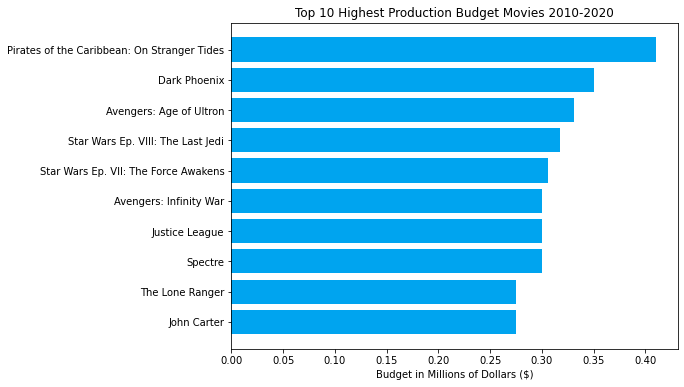

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top10_budget, height_top10_budget, color = '#00A4EF')
ax.set_title('Top 10 Highest Production Budget Movies 2010-2020')
ax.set_xlabel('Budget in Millions of Dollars ($)');

We wanted to create a new column for Profit to see the movies with most profits 

In [29]:
# A new column is created for Profit
df_budget['Profit'] = df_budget['worldwide_gross'] - df_budget['production_budget']
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747


In [30]:
last_10years = df_budget[(df_budget['year'] >= 2010)]
last_10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220
...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0,2014,-15000
5771,72,2015-05-19,Family Motocross,10000,0,0,2015,-10000
5772,73,2012-01-13,Newlyweds,9000,4584,4584,2012,-4416
5777,78,2018-12-31,Red 11,7000,0,0,2018,-7000


In [31]:
top_profitable_movies_in10years = last_10years.sort_values('Profit', ascending = False).iloc[:10]
top_profitable_movies_in10years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,1748134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,1747311220
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,1433854864
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,2015,1328722794
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,2012,1292935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,2011,1216693157
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,1148258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,2018,1135772799
155,56,2013-11-22,Frozen,150000000,400738009,1272469910,2013,1122469910
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,2017,1099199706


In [32]:
height_top10_profit = sorted(last_10years.sort_values(by='Profit', ascending=False)[:10]['Profit'].tolist())
top10_profit = last_10years.sort_values(by='Profit', ascending=False)['movie'][:10].tolist()
height_top10_profit.reverse()

In [33]:
for i in range(len(height_top10_profit)):
    height_top10_profit[i] /= 1000000000

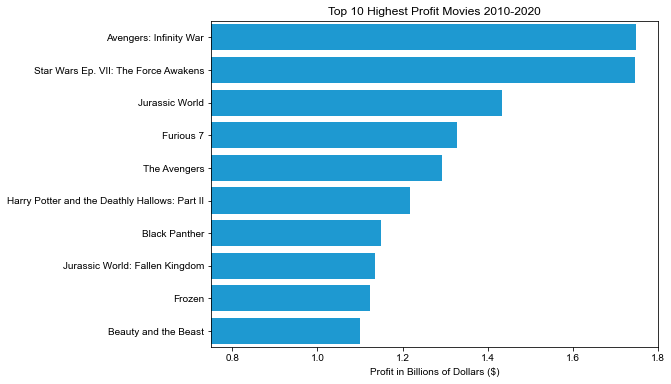

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0.75, 1.8)
barplot = sns.barplot(x = height_top10_profit, y = top10_profit, color='#00A4EF')
barplot.set(title = 'Top 10 Highest Profit Movies 2010-2020', xlabel = 'Profit in Billions of Dollars ($)')
sns.set_style('ticks')
#plt.savefig('profit1.png', bbox_inches='tight');

In [60]:
production_budget_m = sorted(last_10years.sort_values(by='production_budget', ascending=False)['production_budget'].tolist())
for i in range(len(production_budget_m)):
    production_budget_m[i] /= 100000000

In [61]:
profit_b = sorted(last_10years.sort_values(by='Profit', ascending=False)['Profit'].tolist())
for i in range(len(profit_b)):
    profit_b[i] /= 100000000

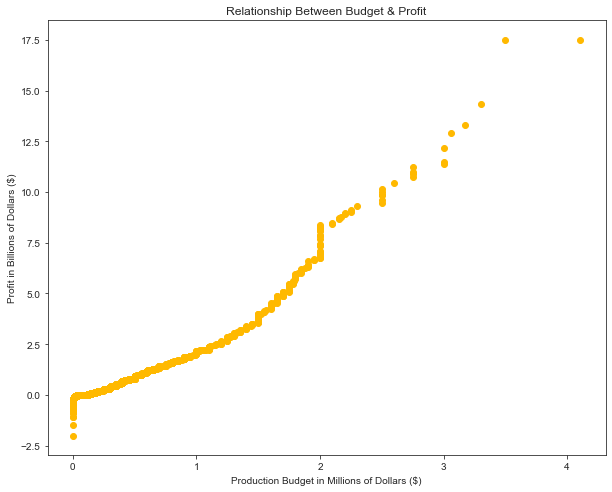

In [67]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x = production_budget_m, y = profit_b, color = '#FFB900')
ax.set_title('Relationship Between Budget & Profit')
ax.set_xlabel('Production Budget in Millions of Dollars ($)')
ax.set_ylabel('Profit in Billions of Dollars ($)');
#plt.savefig('scatter2.png', bbox_inches='tight');

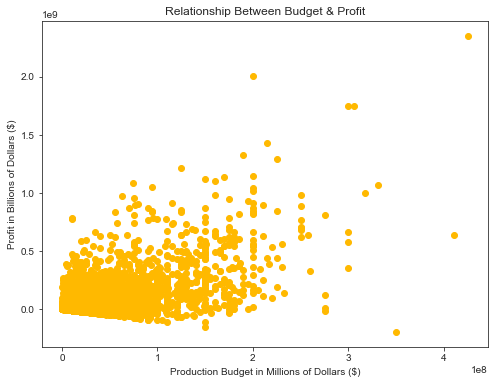

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x = df_budget['production_budget'], y = df_budget['Profit'], color = '#FFB900')
ax.set_title('Relationship Between Budget & Profit')
ax.set_xlabel('Production Budget in Millions of Dollars ($)')
ax.set_ylabel('Profit in Billions of Dollars ($)');

In [39]:
# Correlation coefficient of Production Budget & Profit
df_budget['production_budget'].corr(df_budget['Profit'], method='pearson')

0.6087521471718838

In [42]:
#ROI = (gain from investment – cost of investment) / cost of investment * 100%
df_budget['ROI'] = df_budget['Profit'] / df_budget['production_budget'] * 100
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,Profit,ROI
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,2351345279,553.257713
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,635063875,154.667286
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,-200237650,-57.210757
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,1072413963,324.384139
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,999721747,315.369636
